In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import IsolationForest
from pyod.models.knn import KNN 
import pyod
from pyod.utils.data import evaluate_print
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager
import numpy as np
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.utils.data import generate_data, get_outliers_inliers
import seaborn as sns 
from sklearn.neighbors import NearestNeighbors

In [2]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt

# Import Dataset

In [3]:
df=pd.read_csv('bs140513_032310.csv')

In [4]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [5]:
from sklearn.cluster import KMeans

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.loc[:,['customer']]=le.fit_transform(df.loc[:,['customer']])
df.loc[:,['age']]=le.fit_transform(df.loc[:,['age']])
df.loc[:,['zipcodeOri']]=le.fit_transform(df.loc[:,['zipcodeOri']])
df.loc[:,['zipMerchant']]=le.fit_transform(df.loc[:,['zipMerchant']])
df.loc[:,['merchant']]=le.fit_transform(df.loc[:,['merchant']])
df.loc[:,['category']]=le.fit_transform(df.loc[:,['category']])
df.loc[:,['gender']]=le.fit_transform(df.loc[:,['gender']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [7]:
df.fraud.value_counts()

0    587443
1      7200
Name: fraud, dtype: int64

In [8]:
df_train=df[df.fraud!=1]

# Convert Whole Dataset Into 15 Clusters

In [9]:
kmeans = KMeans(n_clusters=15,random_state=42)

# Normalize Dataset

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaling = MinMaxScaler(feature_range=(-1,1))
x_train=scaling.fit_transform(df_train)

In [12]:
model=kmeans.fit_predict(x_train)

In [13]:
len(model)

587443

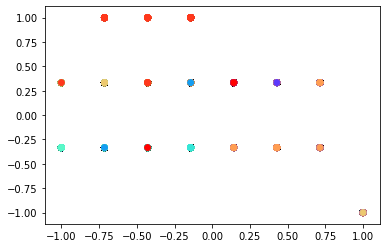

In [39]:
plt.scatter(x_train[:,2],x_train[:,3], c=model, cmap='rainbow')

In [14]:
x_train


array([[-1.        , -0.89783508,  0.14285714, ...,  0.71428571,
        -0.9957573 , -1.        ],
       [-1.        ,  0.3393335 , -0.42857143, ...,  0.71428571,
        -0.96299992, -1.        ],
       [-1.        ,  0.11165167,  0.14285714, ...,  0.71428571,
        -0.9749261 , -1.        ],
       ...,
       [ 1.        , -0.74264169, -0.42857143, ..., -0.71428571,
        -0.97907556, -1.        ],
       [ 1.        , -0.4731209 ,  0.42857143, ...,  0.71428571,
        -0.9865166 , -1.        ],
       [ 1.        ,  0.60739479,  0.14285714, ...,  0.71428571,
        -0.9748888 , -1.        ]])

In [15]:
df_train[model==13]

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
249350,83,4012,4,2,0,2,0,14,156.97,0
250936,84,3854,3,2,0,2,0,14,1.86,0
259018,86,3361,2,2,0,10,0,14,87.80,0
259019,86,3361,2,2,0,2,0,14,75.81,0
259199,86,4061,3,2,0,12,0,10,73.83,0
...,...,...,...,...,...,...,...,...,...,...
594615,179,2896,2,2,0,18,0,12,47.42,0
594621,179,4041,3,2,0,18,0,12,0.55,0
594623,179,3243,2,2,0,18,0,12,6.55,0
594629,179,2158,4,2,0,18,0,12,29.37,0


In [42]:
model

array([ 7, 12,  4, ..., 14,  1, 11])

In [16]:
print(model[:20])

[ 7 12  4  9  4  9  0  4  9  4  4  9 10  7 12  0  7  4  9  9]


In [34]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

In [19]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[1][1])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[0][0])

In [20]:
def print_evaluation_metrics(y_true, y_pred):
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_true, y_pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_true, y_pred)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_true, y_pred)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_true, y_pred)
    print('F1 score: %f' % f1)

In [21]:
df1=df_train[model==1]
df2=df_train[model==2]

In [22]:
fraud_df=df[df.fraud==1]

In [23]:
merge=pd.concat([df1,fraud_df],ignore_index=False)

In [24]:
merge.reset_index(drop=True)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,81,465,4,2,0,2,0,14,13.01,0
1,81,138,6,1,0,2,0,14,45.70,0
2,83,465,4,2,0,2,0,14,148.28,0
3,85,1070,5,1,0,10,0,14,87.88,0
4,85,1070,5,1,0,2,0,14,26.46,0
...,...,...,...,...,...,...,...,...,...,...
51248,179,2456,5,2,0,32,0,8,192.78,1
51249,179,3357,5,1,0,16,0,14,42.37,1
51250,179,2522,3,1,0,16,0,14,521.84,1
51251,179,544,2,1,0,27,0,14,25.29,1


In [25]:
train,test=train_test_split(merge,random_state=42)

In [26]:
test['fraud'].value_counts()

0    11027
1     1787
Name: fraud, dtype: int64

In [29]:
x_train=train.drop('fraud',axis=1)
y_train=train.fraud
xtest=test.drop('fraud',axis=1)
ytest=test.fraud

In [32]:
svc_model = LinearSVC()
svc_model.fit(x_train,y_train)
yhat1 = svc_model.predict(xtest)
fpr1 , tpr1, thresholds1 = roc_curve(ytest, yhat1)
compare=pd.DataFrame()
compare['true']=np.array(ytest)
compare['svc_preicted']=np.array(yhat1)
rf_model = RandomForestClassifier(n_estimators=100, bootstrap = True,max_features = 'sqrt')
rf_model.fit(x_train,y_train)
yhat2 = rf_model.predict(xtest)
compare['rf_preicted']=np.array(yhat2)
print('Confusion Matrix For Cluster',1,':Support Vector Machine\n')
print_confusion_matrix(compare['true'],compare['svc_preicted'])
print('---------------------------------------')
print('\nEvaluation_metrics For Cluster',1,':Support Vector Machine\n')
print_evaluation_metrics(compare['true'],compare['svc_preicted'])
print('\n\nConfusion Matrix For Cluster',1,':Random Forrest Classifier\n')
print_confusion_matrix(compare['true'],compare['rf_preicted'])
print('---------------------------------------')
print('\nEvaluation_metrics For Cluster',1,':Random Forrest Classifier\n')
print_evaluation_metrics(compare['true'],compare['rf_preicted'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Confusion Matrix For Cluster 1 :Support Vector Machine

True positive =  1655
False positive =  23
False negative =  132
True negative =  11004
---------------------------------------

Evaluation_metrics For Cluster 1 :Support Vector Machine

Accuracy: 0.987904
Precision: 0.986293
Recall: 0.926133
F1 score: 0.955267


Confusion Matrix For Cluster 1 :Random Forrest Classifier

True positive =  1772
False positive =  17
False negative =  15
True negative =  11010
---------------------------------------

Evaluation_metrics For Cluster 1 :Random Forrest Classifier

Accuracy: 0.997503
Precision: 0.990497
Recall: 0.991606
F1 score: 0.991051


Text(0, 0.5, 'TPR')

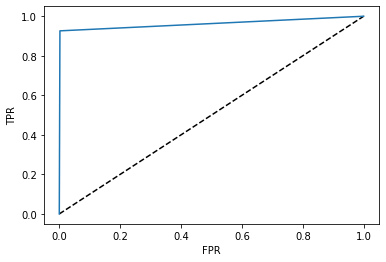

In [38]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Poly")
plt.xlabel("FPR")
plt.ylabel("TPR")

In [48]:
from sklearn import svm, datasets

In [49]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [50]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [51]:
from sklearn.preprocessing import label_binarize
y = label_binarize(y, classes=[0, 1,2])
n_classes = y.shape[1]

In [52]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [35]:
fig = plot_roc_curve(clf, x_train,y_train)
fig = plot_roc_curve(clf, xtest, ytest, ax = fig.ax_)
fig.figure_.suptitle("ROC curve comparison")
plt.show() 

NameError: name 'clf' is not defined

In [ ]:
len(compare[(compare.true==1) & (compare.rf_preicted==1)])

# Result : Cluster Based  Fraud Detection Techniques

In [47]:
import warnings
warnings.filterwarnings("ignore")
fraud_df=df[df.fraud==1]
accuracy=dict()
for i in range (0,15):
    cluster=df_train[model==i]
    merge_cluster=pd.concat([cluster,fraud_df],ignore_index=False)
    merge_cluster=merge_cluster.reset_index(drop=True)
    print('\n\nCluster ',i+1,'Total Rows:',len(merge_cluster))
    train,test=train_test_split(merge_cluster,random_state=42)
    print('Total Fraud and Non Fraud rows in Train Dataset')
    print('---------------------------------------')
    print(train['fraud'].value_counts())
    x_train=train.drop('fraud',axis=1)
    y_train=train.fraud
    xtest=test.drop('fraud',axis=1)
    ytest=test.fraud
    svc_model = LinearSVC()
    svc_model.fit(x_train,y_train)
    yhat1 = svc_model.predict(xtest)
    compare=pd.DataFrame()
    compare['true']=np.array(ytest)
    compare['svc_preicted']=np.array(yhat1)
    rf_model = RandomForestClassifier(n_estimators=100, bootstrap = True,max_features = 'sqrt')
    rf_model.fit(x_train,y_train)
    yhat2 = rf_model.predict(xtest)
    compare['rf_preicted']=np.array(yhat2)
    print('\n\nConfusion Matrix For Cluster',i+1,':Support Vector Machine\n')
    print_confusion_matrix(compare['true'],compare['svc_preicted'])
    print('---------------------------------------')
    print('\nEvaluation_metrics For Cluster',i+1,':Support Vector Machine\n')
    print_evaluation_metrics(compare['true'],compare['svc_preicted'])
    print('---------------------------------------')
    print('\n\nConfusion Matrix For Cluster',i+1,':Random Forrest Classifier\n')
    print_confusion_matrix(compare['true'],compare['rf_preicted'])
    print('---------------------------------------')
    print('\nEvaluation_metrics For Cluster',i+1,':Random Forrest Classifier\n')
    print_evaluation_metrics(compare['true'],compare['rf_preicted'])




Cluster  1 Total Rows: 45287
Total Fraud and Non Fraud rows in Train Dataset
---------------------------------------
0    28580
1     5385
Name: fraud, dtype: int64


Confusion Matrix For Cluster 1 :Support Vector Machine

True positive =  1603
False positive =  9
False negative =  212
True negative =  9498
---------------------------------------

Evaluation_metrics For Cluster 1 :Support Vector Machine

Accuracy: 0.980480
Precision: 0.994417
Recall: 0.883196
F1 score: 0.935512
---------------------------------------


Confusion Matrix For Cluster 1 :Random Forrest Classifier

True positive =  1792
False positive =  17
False negative =  23
True negative =  9490
---------------------------------------

Evaluation_metrics For Cluster 1 :Random Forrest Classifier

Accuracy: 0.996467
Precision: 0.990603
Recall: 0.987328
F1 score: 0.988962


Cluster  2 Total Rows: 51253
Total Fraud and Non Fraud rows in Train Dataset
---------------------------------------
0    33026
1     5413
Name: frau



Confusion Matrix For Cluster 11 :Support Vector Machine

True positive =  1639
False positive =  311
False negative =  140
True negative =  4882
---------------------------------------

Evaluation_metrics For Cluster 11 :Support Vector Machine

Accuracy: 0.935313
Precision: 0.840513
Recall: 0.921304
F1 score: 0.879056
---------------------------------------


Confusion Matrix For Cluster 11 :Random Forrest Classifier

True positive =  1672
False positive =  32
False negative =  107
True negative =  5161
---------------------------------------

Evaluation_metrics For Cluster 11 :Random Forrest Classifier

Accuracy: 0.980063
Precision: 0.981221
Recall: 0.939854
F1 score: 0.960092


Cluster  12 Total Rows: 42891
Total Fraud and Non Fraud rows in Train Dataset
---------------------------------------
0    26755
1     5413
Name: fraud, dtype: int64


Confusion Matrix For Cluster 12 :Support Vector Machine

True positive =  1629
False positive =  92
False negative =  158
True negative =  88